## German Credit Risk

Данные:
- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text: little, moderate, quite rich, rich)
- Checking account (numeric: in DM - Deutsch Mark)
- Credit amount (numeric: in DM)
- Duration (numeric: in month)
- Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [216]:
!pip install category_encoders

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly as py
import os
import plotly.io as pio
pio.renderers.default='notebook'

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as shc


import category_encoders as ce

plt.style.use('seaborn-colorblind')
%matplotlib inline

In [217]:
df = pd.read_csv('https://raw.githubusercontent.com/SaravananJaichandar/Credit-Risk-Model/master/german_credit_data.csv', index_col = 'Unnamed: 0')
print(df.shape)
df.head()

(1000, 9)


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


In [219]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [220]:
df.describe(include=['object'])

,Sex,Housing,Saving accounts,Checking account,Purpose
count,1000,1000,817,606,1000
unique,2,3,4,3,8
top,male,own,little,little,car
freq,690,713,603,274,337


In [221]:
df.nunique()

,0
Age,53
Sex,2
Job,4
Housing,3
Saving accounts,4
Checking account,3
Credit amount,921
Duration,33
Purpose,8


In [222]:
numeric = ['Age', 'Job', 'Credit amount', 'Duration']
categorical = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

## Exploratory Data Analysis

In [223]:
df= df.fillna('unknown')

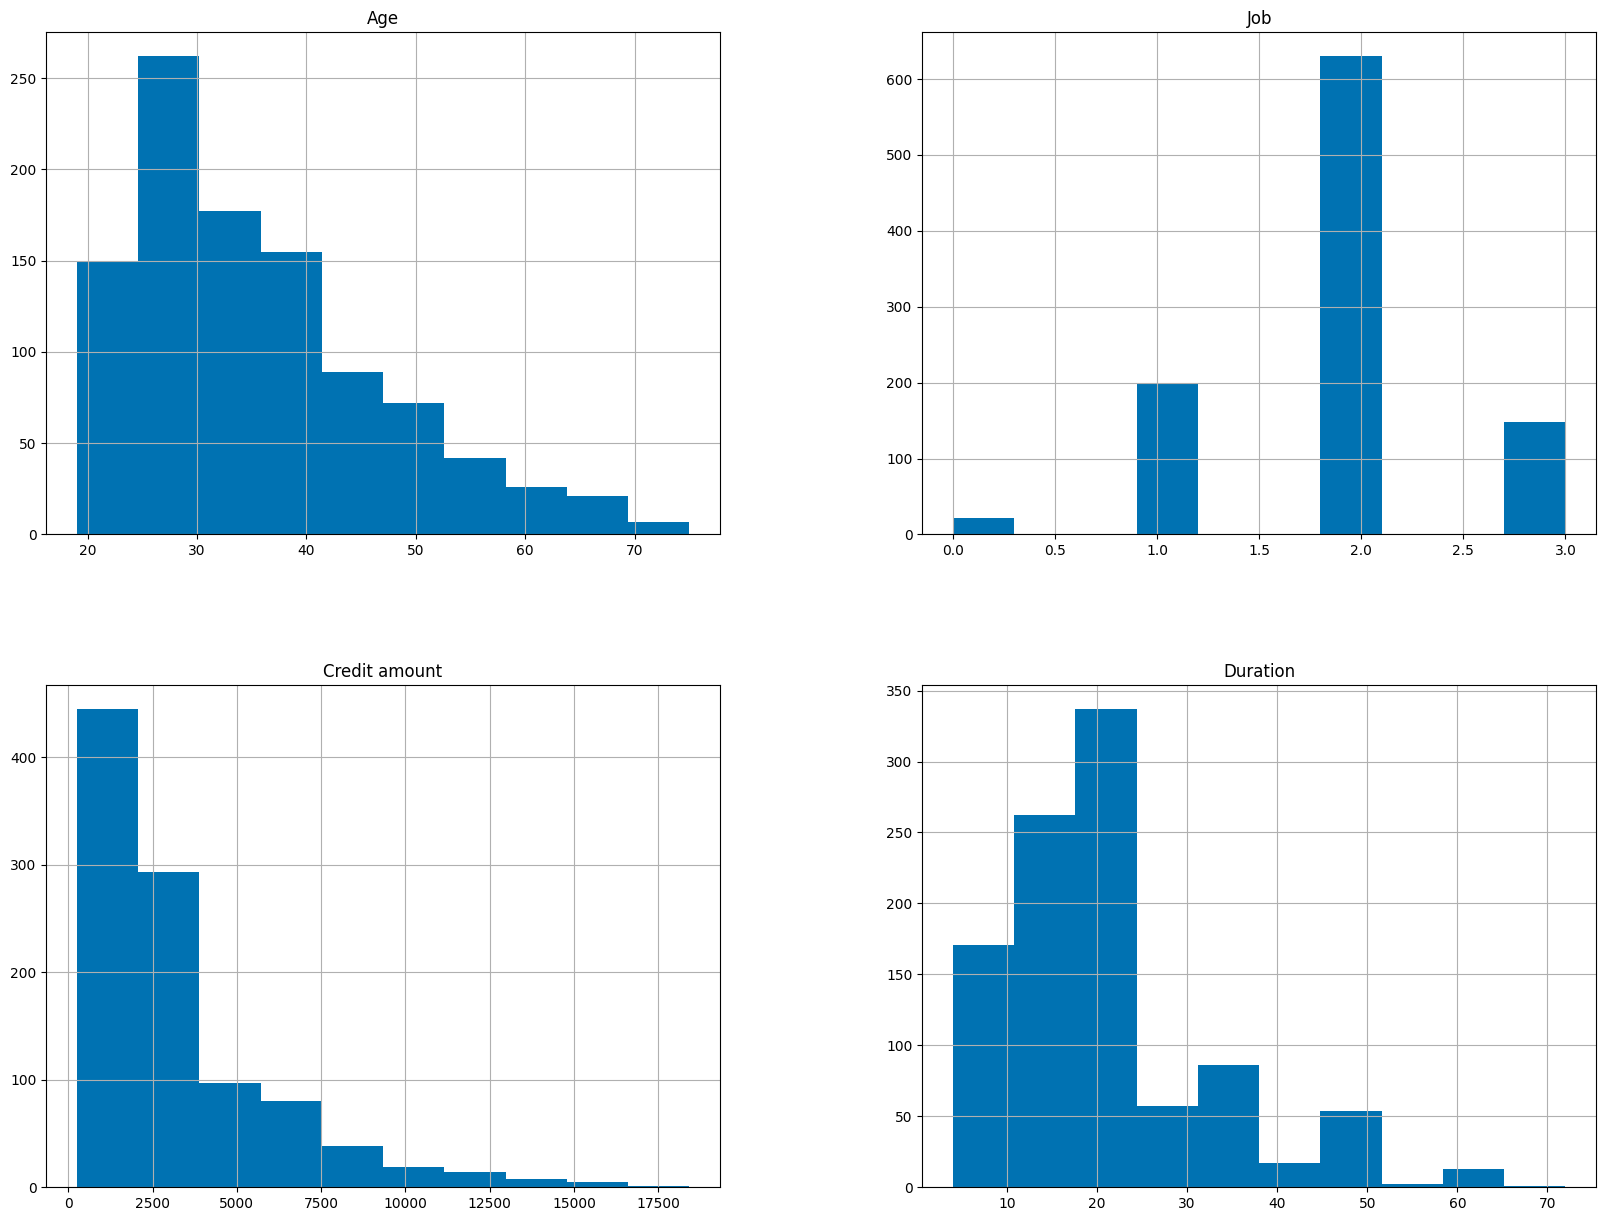

In [224]:
df.hist(figsize = (20,15));

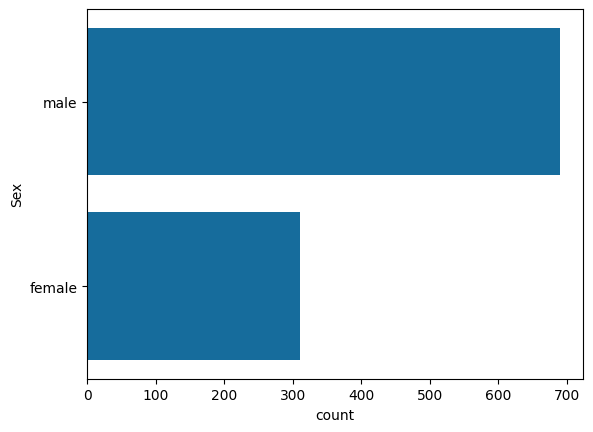

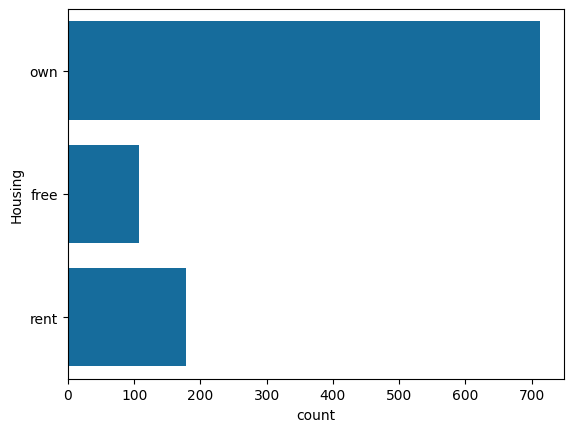

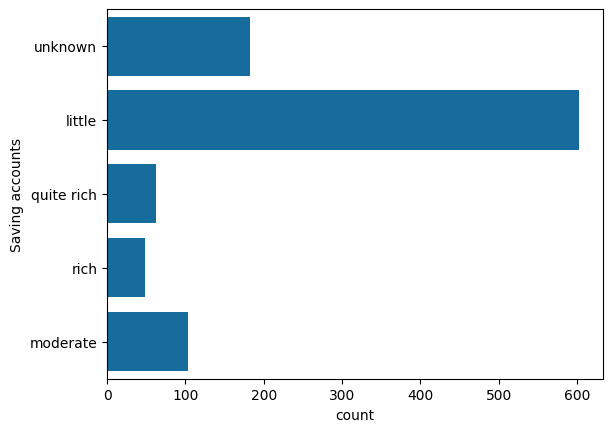

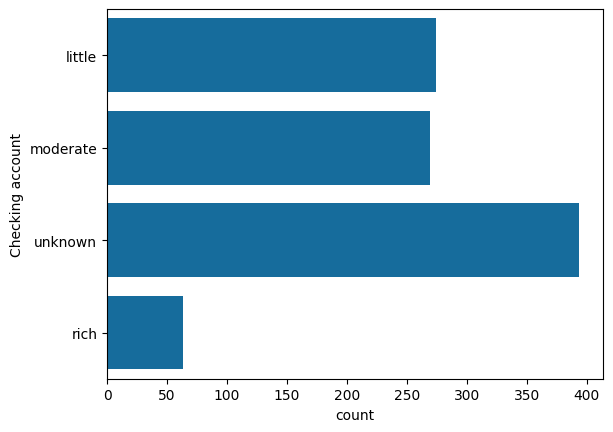

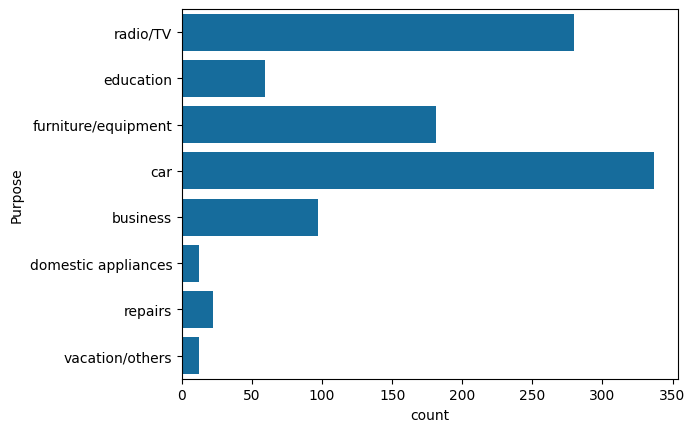

In [225]:
for col in df[categorical].columns:
    sns.countplot(y =col, data = df)
    plt.show()

- Распределение `Age` с положительной асимметрией, необходимо применить логарифмическую трансформацию;
- Мужчин в два раза больше чем женщин;
- Большинство клиентов обеспеченные люди;
- Большинство клиентов проживают в собственных домах;
- Большинство клиентов имеют небольшие накопительные счета;
- Распределение `Credit Amount` с положительной асимметрией, необходимо применить логарифмическую трансформацию;
- Большинство кредитов на 2 года.

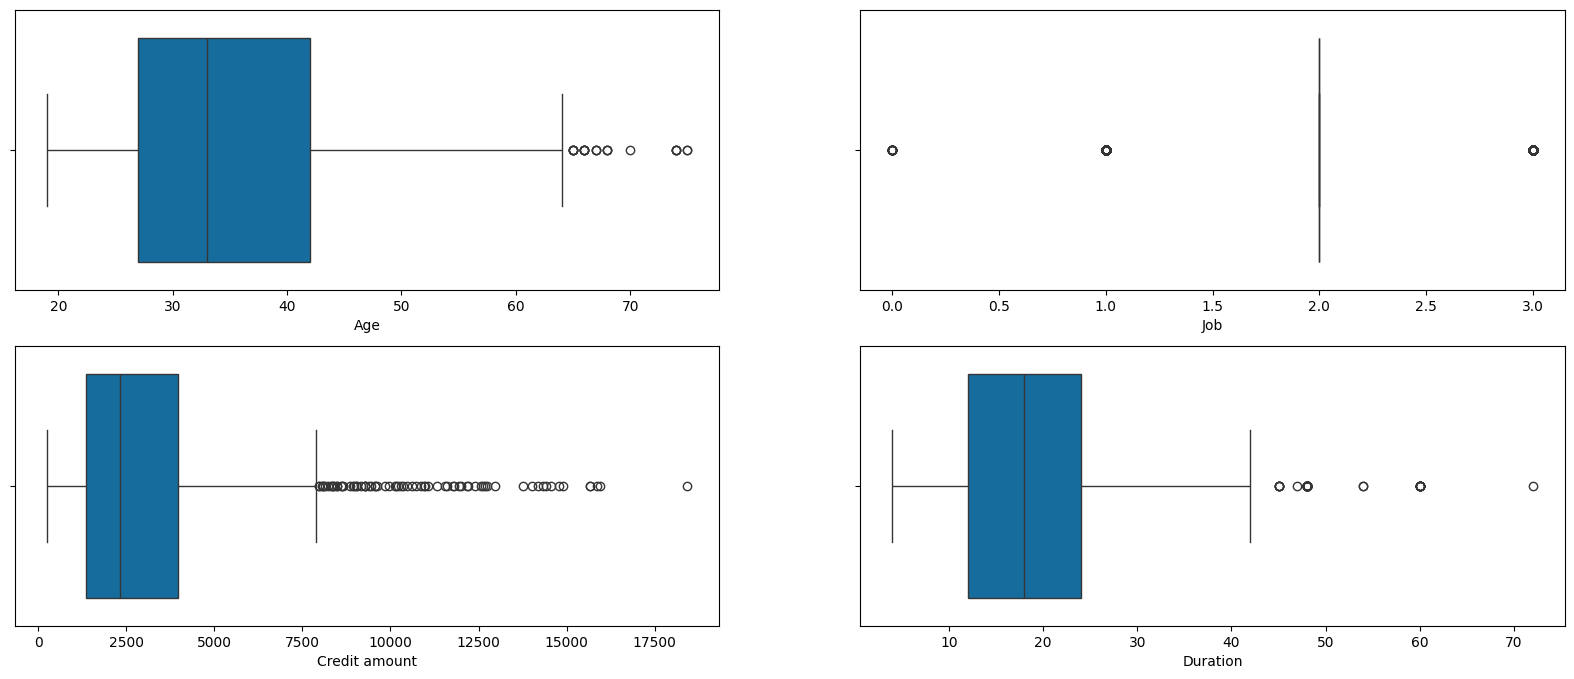

In [226]:
plt.figure(figsize=(20,8))
plotnumber =1
for column in df[numeric]:
    ax = plt.subplot(2,2,plotnumber)
    sns.boxplot(data = df, x = column)
    plt.xlabel(column)
    plotnumber+=1
plt.show()

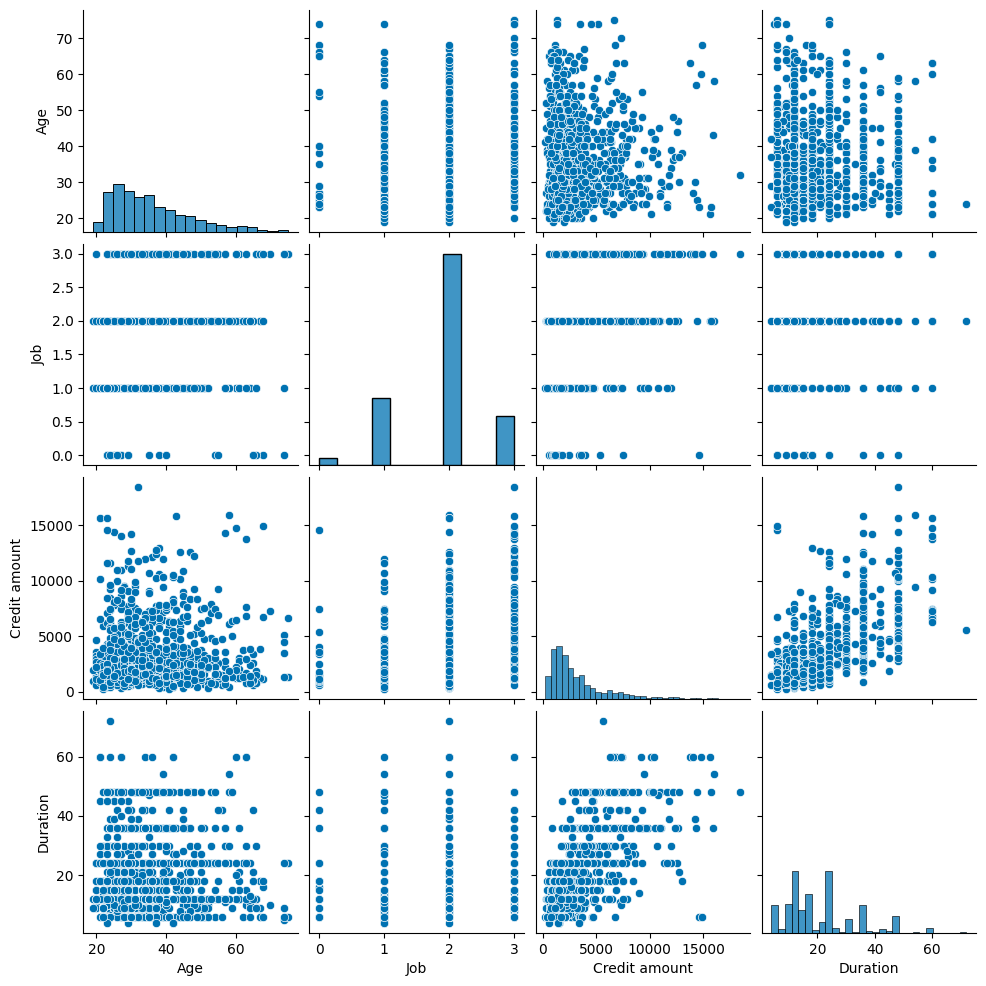

In [227]:
sns.pairplot(df)
plt.show;

## Feature engineering

#### Numerical

In [228]:
data = df.copy()

<Axes: >

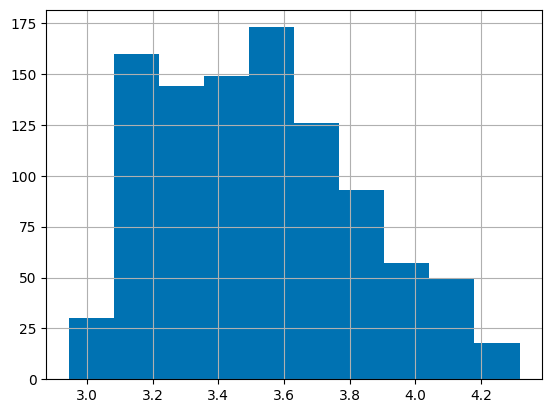

In [229]:
np.log(data['Age']).hist()

In [230]:
data['Age'] = np.log(data['Age'])

<Axes: >

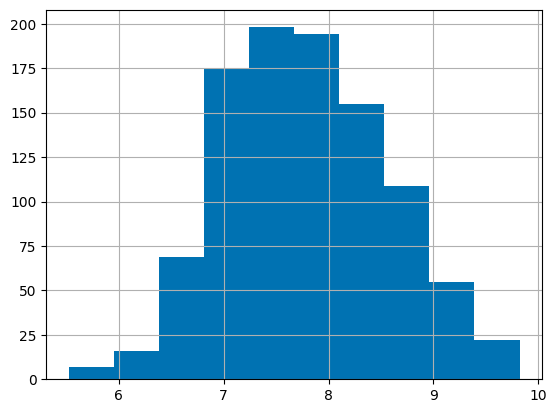

In [231]:
np.log(data['Credit amount']).hist()

In [232]:
data['Credit amount'] = np.log(data['Credit amount'])

#### Categorical

In [233]:
from sklearn.preprocessing import LabelEncoder

In [234]:
encoder = LabelEncoder()
from sklearn.preprocessing import LabelEncoder
for label in categorical:
    data[label] = encoder.fit_transform(data[label])

In [236]:
data[categorical]

,Sex,Housing,Saving accounts,Checking account,Purpose
0,1,1,4,0,5
1,0,1,0,1,5
2,1,1,0,3,3
3,1,0,0,0,4
4,1,0,0,0,1
...,...,...,...,...,...
995,0,1,0,3,4
996,1,1,0,0,1
997,1,1,0,3,5
998,1,0,0,0,5


#### Scaling

In [237]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(X_scaled, columns=data.columns)
data_scaled.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,2.271006,0.670280,0.146949,-0.133710,1.833169,-1.254566,-0.933901,-1.236478,1.073263
1,-1.446152,-1.491914,0.146949,-0.133710,-0.699707,-0.459026,1.163046,2.248194,1.073263
2,1.226696,0.670280,-1.383771,-0.133710,-0.699707,1.132053,-0.181559,-0.738668,0.061705
3,0.942455,0.670280,0.146949,-2.016956,-0.699707,-1.254566,1.525148,1.750384,0.567484
4,1.488620,0.670280,0.146949,-2.016956,-0.699707,-1.254566,0.904743,0.256953,-0.949853


Для кластеризации нам нужен способ вычисления расстояния между парами точек данных. Точки данных, которые находятся близко друг к другу, с большей вероятностью будут принадлежать к одному кластеру.
Причина, по которой мы нормализуем данные, заключается в том, чтобы убедиться, что все измерения обрабатываются одинаково. Другими словами, мы хотим, чтобы каждый столбец вносил одинаковое влияние на расстояние.

#### PCA

In [238]:
from sklearn.decomposition import PCA

In [239]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [240]:
X_pca.shape

(1000, 2)

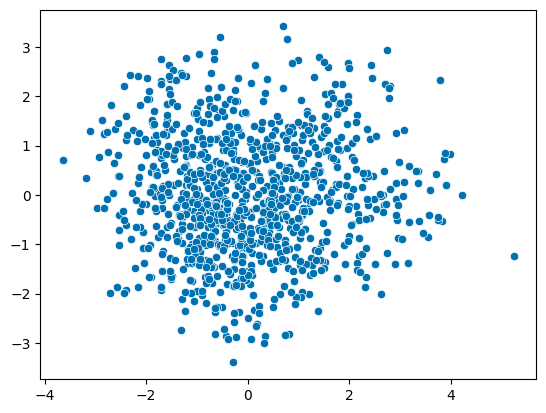

In [241]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1]);

#### UMAP

In [242]:
!pip install umap-learn
import umap

In [243]:
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X_scaled)

In [244]:
X_umap.shape

(1000, 2)

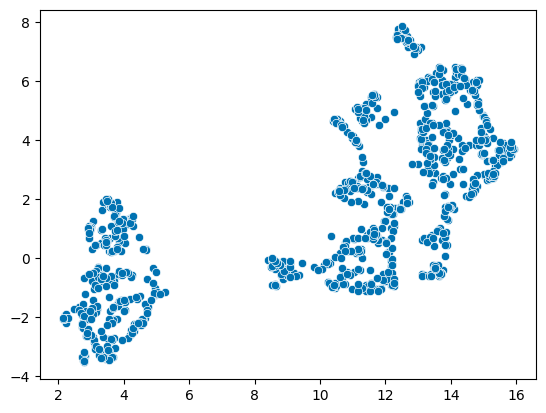

In [245]:
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1]);

#### tSNE

In [246]:
from sklearn.manifold import TSNE

In [247]:
tsne = TSNE(n_components=2, random_state=10)
X_tsne = tsne.fit_transform(X_scaled)

In [248]:
X_tsne.shape

(1000, 2)

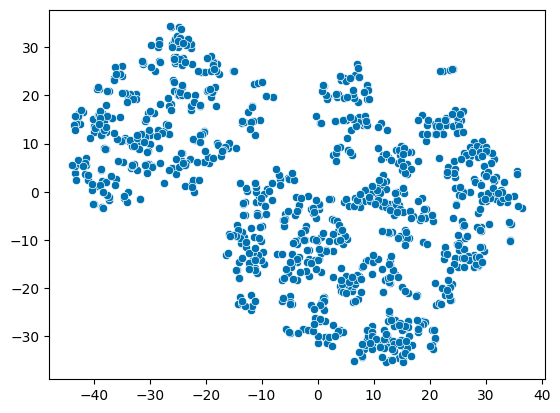

In [249]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1]);

## Clustering

#### K-means

In [251]:
import warnings
warnings.filterwarnings('ignore')

In [252]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=10).fit(data_scaled)
    labels = kmeans.labels_
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)

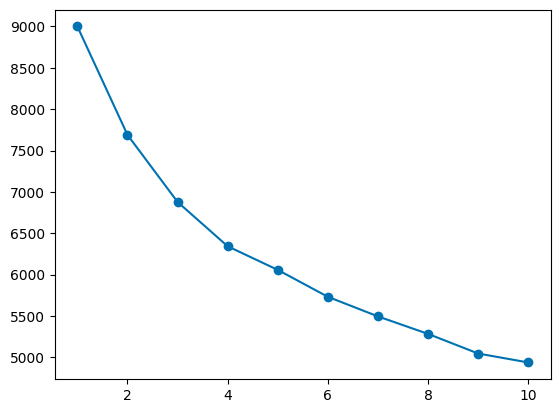

In [253]:
plt.plot(range(1,11), inertia, marker='o');

In [254]:
D = []
for i in range(1,9):
    Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    D.append(Di)

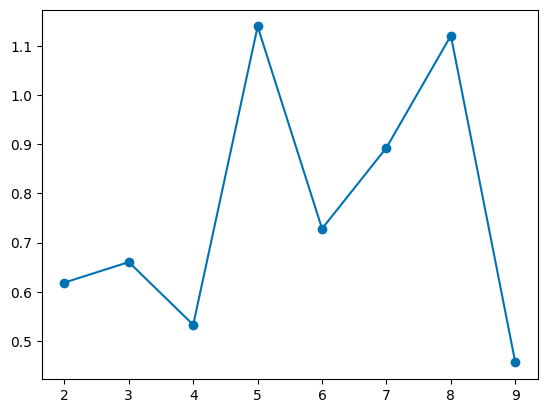

In [257]:
plt.plot(range(2,10), D, marker='o');

In [335]:
kmeans = KMeans(n_clusters=5, n_init='auto', random_state=10).fit(X_scaled)
labels_kmeans = kmeans.labels_

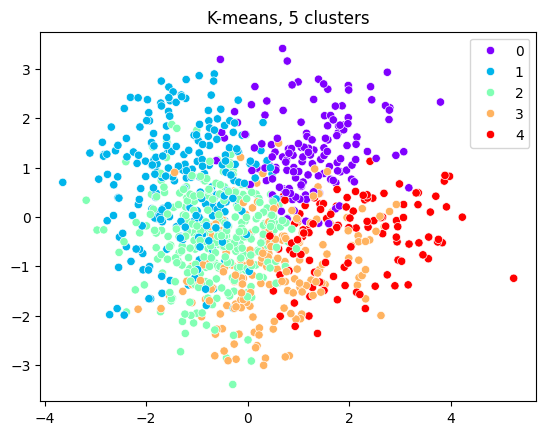

In [336]:
plt.title('K-means, 5 clusters')
sns.scatterplot(x = X_pca[:,0], y = X_pca[:,1], hue=labels_kmeans, palette='rainbow');

In [337]:
data_clustered = df.copy()
data_clustered['cluster_kmeans'] = labels_kmeans

#### Hierarhical

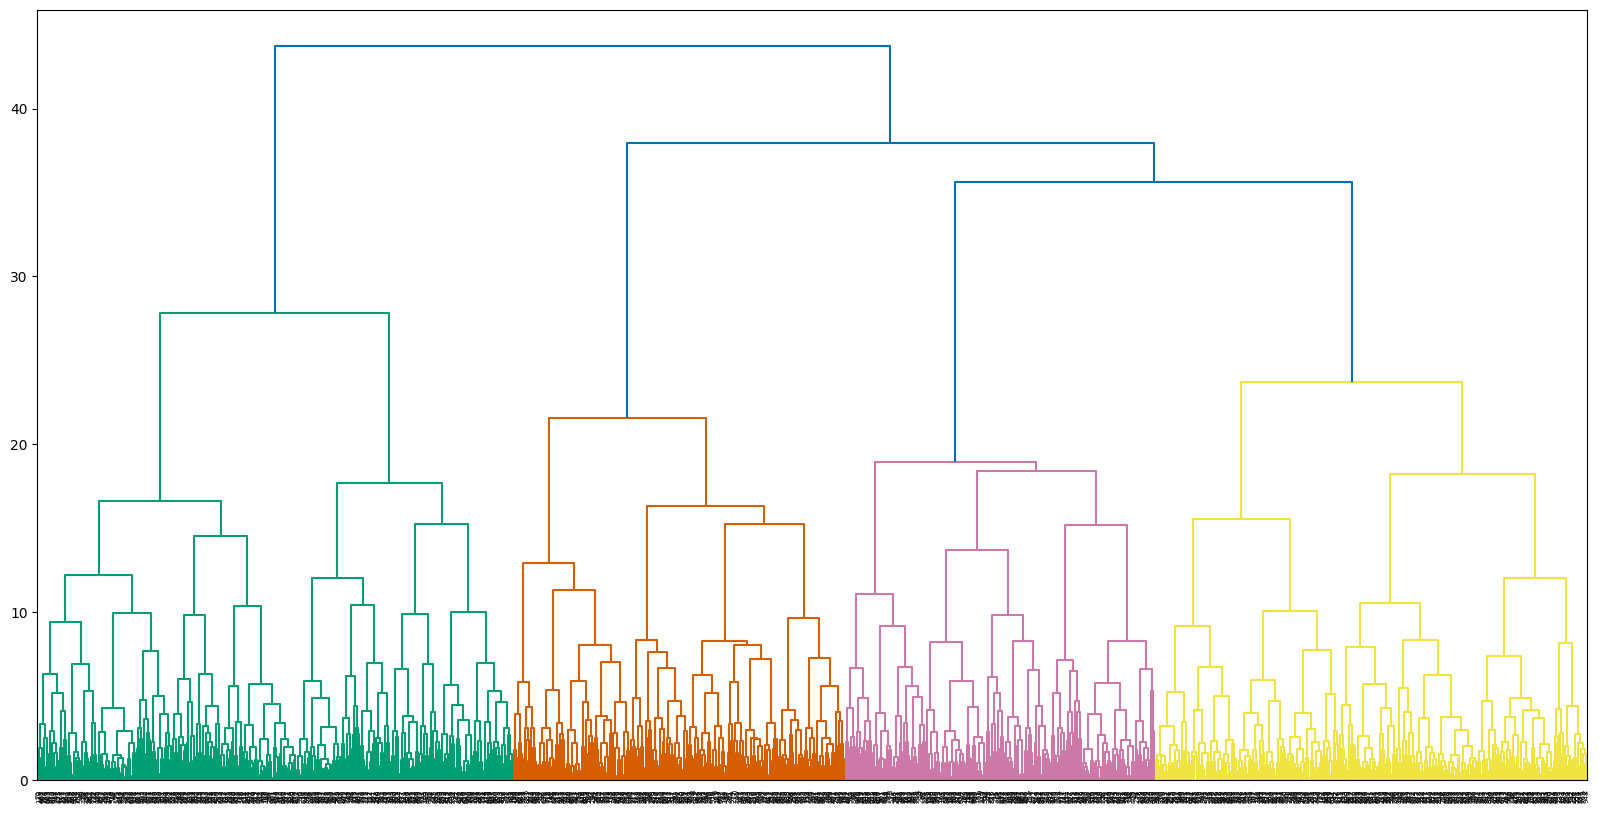

In [262]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(20,10))
linkage_ = linkage(X_scaled, method='ward')
dendrogram_ = dendrogram(linkage_)

Оптимальное количество кластеров 3-5

In [268]:
from tqdm import tqdm
from sklearn.metrics import silhouette_score
silhouette = []
for i in tqdm(range(2,11)):
    agg = AgglomerativeClustering(n_clusters=i).fit(X_scaled)
    labels = agg.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette.append(score)

100%|██████████| 9/9 [00:00<00:00, 16.53it/s]


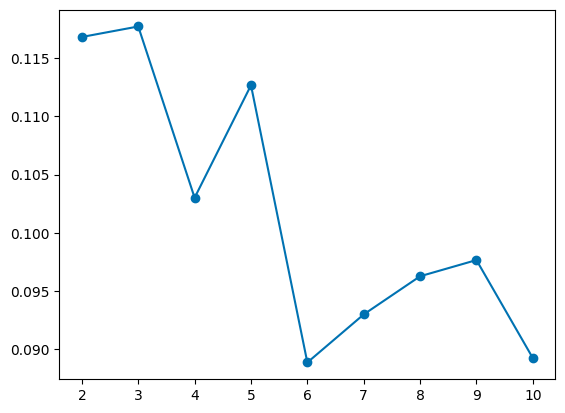

In [270]:
plt.plot(range(2,11), silhouette, marker='o');

In [274]:
agg_cluster = AgglomerativeClustering(n_clusters = 4).fit(X_scaled)
labels_agg = agg_cluster.labels_

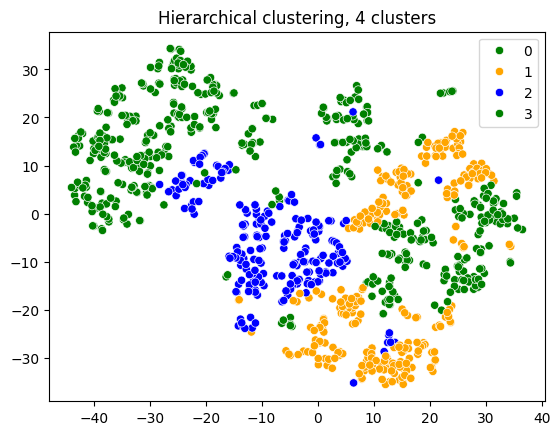

In [275]:
plt.title('Hierarchical clustering, 4 clusters')
sns.scatterplot(x = X_tsne[:, 0], y = X_tsne[:, 1], hue=agg_cluster.labels_,  palette=['green','orange','blue']);

In [276]:
data_clustered['cluster_agg'] = labels_agg

#### DBSCAN

In [277]:
def dbscan_clustering(eps_range, X):
    eps_range = eps_range
    silhouette = []
    clusters = []
    for i in tqdm(eps_range):
        dbscan = DBSCAN(eps=i).fit(X)
        labels = dbscan.labels_
        uniq_labels = np.unique(labels)
        n_clusters = len(uniq_labels[uniq_labels != -1])
        if n_clusters > 1:
            score = silhouette_score(X, labels)
        else:
            score = 0
        silhouette.append(score)
        clusters.append(n_clusters)

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.plot(eps_range, silhouette, marker='o', color=color)
    ax1.set_xlabel('eps')
    ax1.set_ylabel('silhouette', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.plot(eps_range, clusters, marker='o', color=color)
    ax2.set_ylabel('n_clusters', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

100%|██████████| 60/60 [00:03<00:00, 16.54it/s]


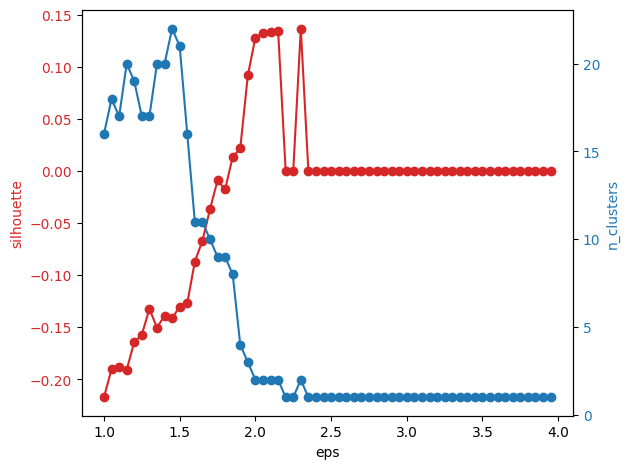

In [278]:
eps_range = np.arange(1,4,0.05)
dbscan_clustering(eps_range, X_scaled)

100%|██████████| 20/20 [00:01<00:00, 13.64it/s]


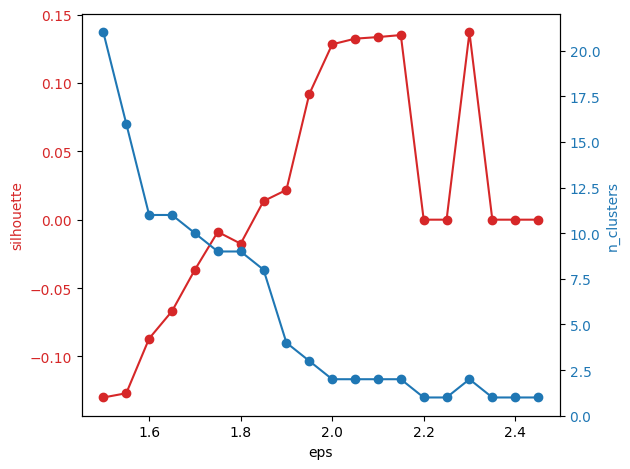

In [279]:
eps_range = np.arange(1.5,2.5,0.05)
dbscan_clustering(eps_range, X_scaled)

100%|██████████| 55/55 [00:04<00:00, 13.73it/s]


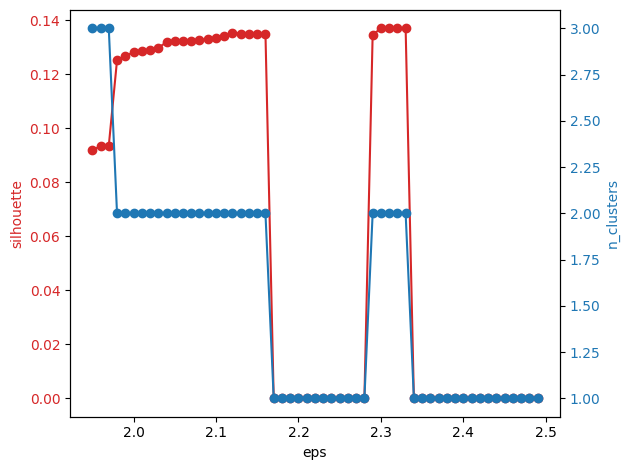

In [280]:
eps_range = np.arange(1.95,2.5,0.01)
dbscan_clustering(eps_range, X_scaled)

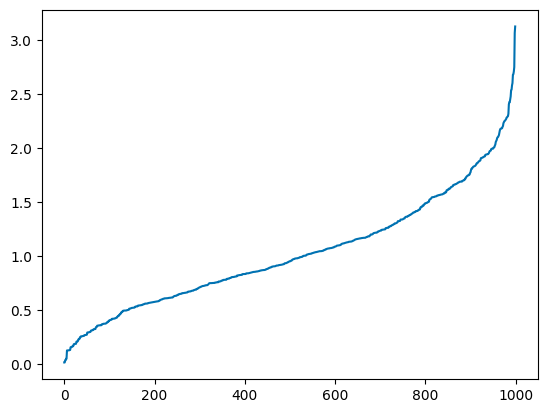

In [281]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances)

Considering two methods to find optimal parametrs for DBSCAN:
- eps = 2.15
- min_samples >= dimensinality + 1

In [282]:
dbscan = DBSCAN(eps=2.15, min_samples=10).fit(X_scaled)
labels_dbscan = dbscan.labels_

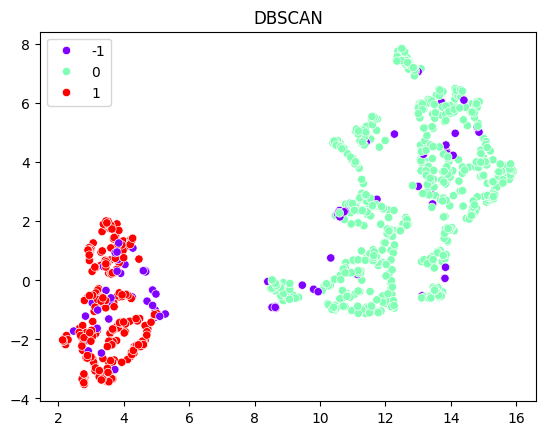

In [283]:
plt.title('DBSCAN')
sns.scatterplot(x = X_umap[:,0], y = X_umap[:,1], hue=labels_dbscan, palette='rainbow');

In [284]:
data_clustered['cluster_dbscan'] = labels_dbscan

## Interpretation

In [338]:
data_clustered['cluster_kmeans'].value_counts()

,count
cluster_kmeans,
2,313
1,246
3,184
0,147
4,110


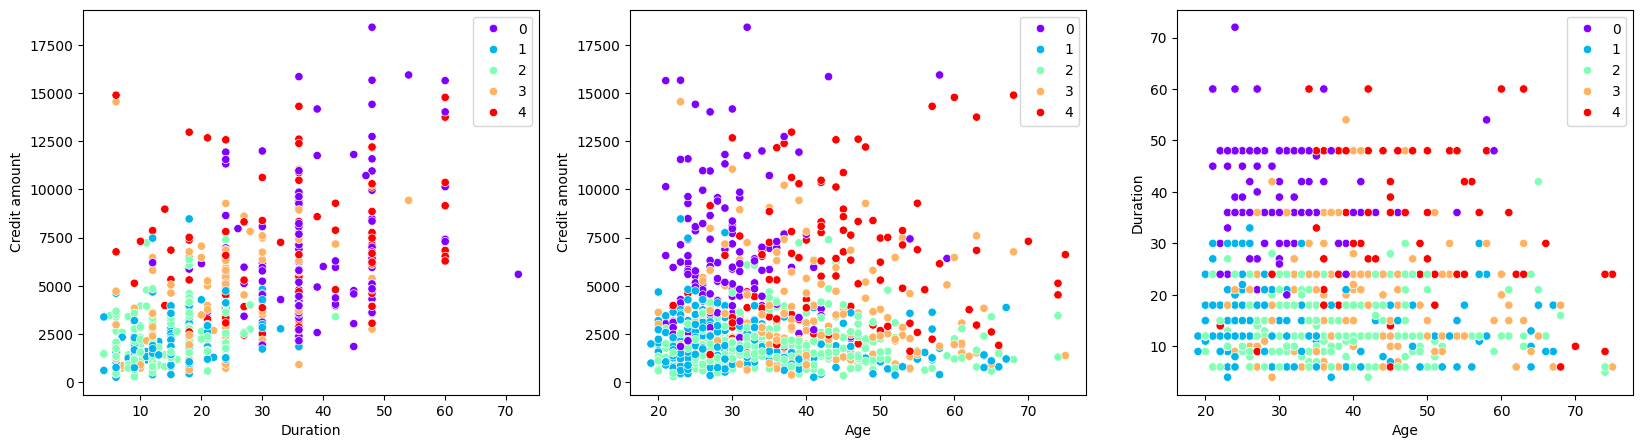

In [339]:
fig, ax  = plt.subplots(1,3,figsize=(20,5))
sns.scatterplot(x = data_clustered['Duration'], y = data_clustered['Credit amount'], hue=labels_kmeans, ax=ax[0], palette='rainbow');
sns.scatterplot(x = data_clustered['Age'], y = data_clustered['Credit amount'], hue=labels_kmeans, ax=ax[1], palette='rainbow');
sns.scatterplot(x = data_clustered['Age'], y = data_clustered['Duration'], hue=labels_kmeans, ax=ax[2], palette='rainbow');

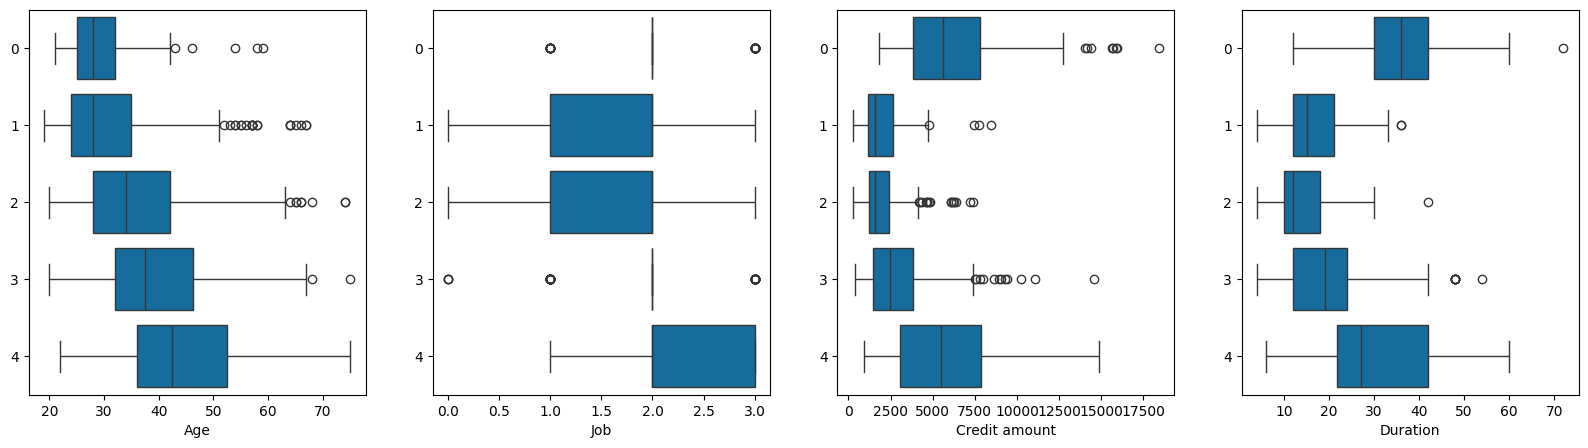

In [340]:
fig, ax  = plt.subplots(1,4,figsize=(20,5))
index = 0
for col in data_clustered[numeric].columns:
    sns.boxplot(data=data_clustered, x=col, y=labels_kmeans, ax=ax[index], orient='h')
    index += 1

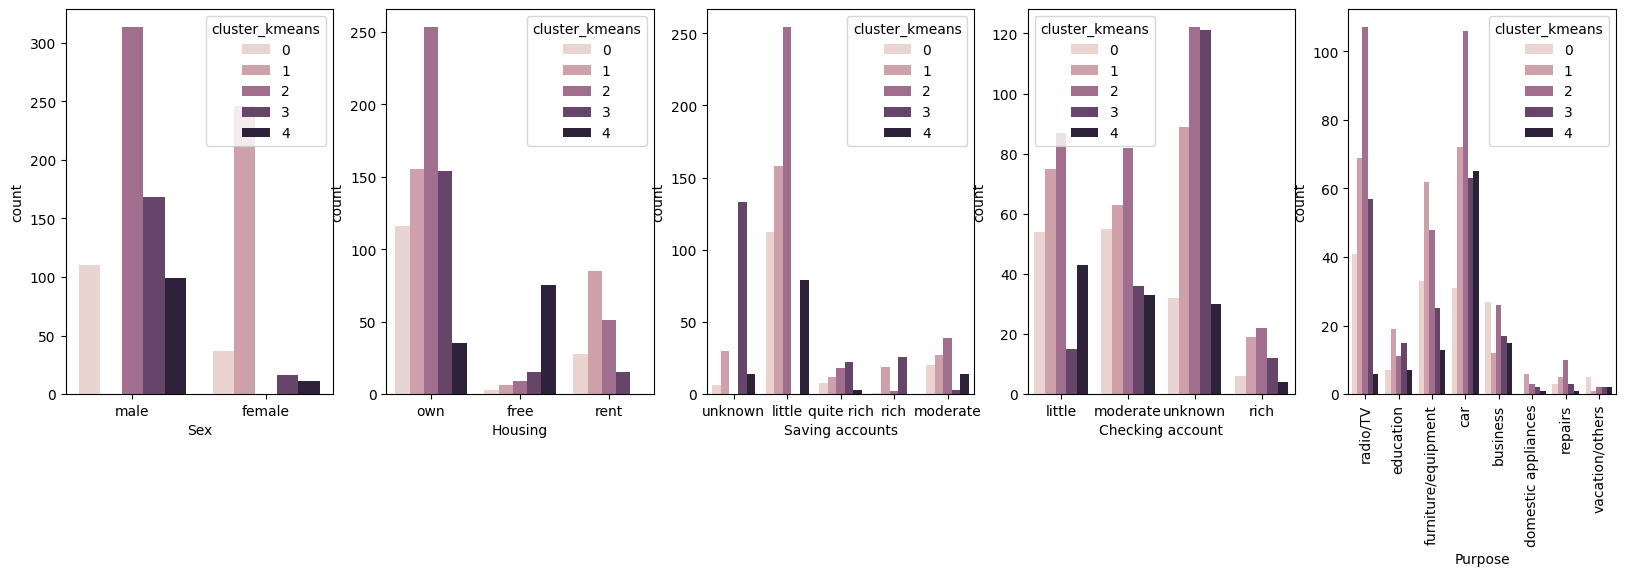

In [341]:
fig, ax  = plt.subplots(1,5,figsize=(20,5))
index = 0
for cat in categorical:
    sns.countplot(data = data_clustered, hue=data_clustered['cluster_kmeans'], ax=ax[index], x = cat)
    index += 1
    plt.xticks(rotation=90)

## Conclusion

- **0 кластер**: в среднем самые молодые (26-31 лет) клиенты с образованием, берут большие кредиты - предположение - это молодые специалисты, которые берут большой кредит на ремонт/бизнес/машину/отдых
- **1 кластер**: клиенты (25-35 лет) женского пола - берут небольшие кредиты на медиа-технику, ремонт или машину до 2500 DM
- **2 кластер**: клиенты (28-40 лет) мужского пола - берут небольшие кредиты на медиа-технику или машину до 2500 DM, имеют небольшие сбережения и нет информации о расчётном счёте, т.е. вероятно не являются клиентом данного банка
- **3 кластер**: клиенты (30-45 лет) мужского пола - берут средний кредит на медиа-технику или машину до 4000 DM
- **4 кластер**: клиенты (35-52 года) преимущественно мужского пола - берут большие кредиты на долгий срок имея небольшие сберегательные счета и небольшой расчётный счёт на дорогие машины
- В целом, все клиенты обеспеченные, нет информации о расчётном счёте